# EDA

## Import Libraries

In [29]:
import numpy as np
import pandas as pd
import model.preprocess_games as ppg
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


## Importing the dataset

In [2]:
DATA_PATH = 'data'

SEASONS_PROCESSED_DS = f"{DATA_PATH}/seasons.processed.feather"

TEAMS_DS = f"{DATA_PATH}/teams.processed.feather"
TEAMS_PROCESSED_DS = f"{DATA_PATH}/teams.processed.feather"

GAMES_DS = f"{DATA_PATH}/games.csv"
GAMES_PROCESSED_DS = f"{DATA_PATH}/games.processed.feather"

In [3]:
games = pd.read_csv(GAMES_DS, parse_dates=["GAME_DATE_EST"], usecols=["GAME_ID",'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS']
                    , infer_datetime_format=True, index_col="GAME_ID")
games = games.sort_values(by=['GAME_DATE_EST', 'GAME_ID'])
teams = pd.read_feather(TEAMS_PROCESSED_DS)
seasons = pd.read_feather(SEASONS_PROCESSED_DS)
games_matchup = pd.read_feather(GAMES_PROCESSED_DS)
games_matchup = games_matchup.set_index(["GAME_ID"])
games_matchup = games_matchup.sort_values(by=['GAME_DATE_EST', 'GAME_ID'])
games_matchup

,GAME_DATE_EST,HOME_TEAM_NAME,HOME_TEAM_ID,VISITOR_TEAM_NAME,VISITOR_TEAM_ID,GAME_STATUS_TEXT,SEASON,HT_RANK,HT_CLASS,HT_HW,HT_HL,HT_VW,HT_VL,HT_LAST10_W,HT_LAST10_L,HT_LAST10_MATCHUP_W,HT_LAST10_MATCHUP_L,HT_OVERALL_OFF_POINTS,HT_OVERALL_DEF_POINTS,HT_OVERALL_OFF_FG,HT_OVERALL_DEF_FG,HT_OVERALL_OFF_3P,HT_OVERALL_DEF_3P,HT_OVERALL_OFF_FT,HT_OVERALL_DEF_FT,HT_OVERALL_OFF_REB,HT_OVERALL_DEF_REB,HT_AWAY_POINTS,HT_AWAY_FG,HT_AWAY_3P,HT_AWAY_FT,HT_AWAY_REB,VT_RANK,VT_CLASS,VT_HW,VT_HL,VT_VW,VT_VL,VT_LAST10_W,VT_LAST10_L,VT_LAST10_MATCHUP_W,VT_LAST10_MATCHUP_L,VT_OVERALL_OFF_POINTS,VT_OVERALL_DEF_POINTS,VT_OVERALL_OFF_FG,VT_OVERALL_DEF_FG,VT_OVERALL_OFF_3P,VT_OVERALL_DEF_3P,VT_OVERALL_OFF_FT,VT_OVERALL_DEF_FT,VT_OVERALL_OFF_REB,VT_OVERALL_DEF_REB,VT_AWAY_POINTS,VT_AWAY_FG,VT_AWAY_3P,VT_AWAY_FT,VT_AWAY_REB,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21600001,2016-10-25,CLE,1610612739,NYK,1610612752,Final,2016,None,None,120,118,87,151,6,4,7,3,98.626,100.746,0.443,0.464,0.352,0.365,0.744,0.749,42.540,42.168,97.958,0.440,0.344,0.746,41.563,None,None,123,115,95,143,3,7,3,7,98.891,99.796,0.445,0.457,0.356,0.362,0.775,0.755,41.288,42.899,97.634,0.439,0.361,0.771,40.992,117.0,0.479,0.737,0.371,31.0,51.0,88.0,0.368,0.750,0.333,17.0,42.0,1
21600002,2016-10-25,POR,1610612757,UTA,1610612762,Final,2016,None,None,163,75,95,143,7,3,7,3,101.071,99.882,0.449,0.459,0.357,0.354,0.789,0.757,43.185,42.708,98.916,0.442,0.355,0.781,42.391,None,None,137,101,84,154,5,5,3,7,97.416,98.548,0.453,0.457,0.343,0.364,0.750,0.760,42.288,40.763,95.794,0.445,0.339,0.749,41.550,113.0,0.520,1.000,0.684,22.0,34.0,104.0,0.488,1.000,0.333,19.0,31.0,1
21600003,2016-10-25,GSW,1610612744,SAS,1610612759,Final,2016,None,None,171,67,126,112,8,2,4,6,105.487,101.788,0.469,0.444,0.393,0.343,0.768,0.761,43.630,44.126,103.882,0.459,0.390,0.759,43.248,None,None,204,34,149,89,6,4,6,4,103.742,96.433,0.480,0.447,0.384,0.349,0.778,0.763,42.819,41.653,101.618,0.467,0.365,0.779,42.256,100.0,0.471,0.722,0.212,24.0,35.0,129.0,0.480,0.885,0.500,25.0,55.0,0
21600004,2016-10-26,ORL,1610612753,MIA,1610612748,Final,2016,None,None,117,121,75,163,6,4,2,8,97.055,99.410,0.451,0.456,0.351,0.355,0.732,0.753,42.597,42.626,95.265,0.444,0.343,0.730,41.798,None,None,175,63,134,104,6,4,8,2,100.111,95.985,0.480,0.445,0.358,0.351,0.758,0.750,40.374,40.288,97.752,0.471,0.352,0.748,40.168,96.0,0.382,0.786,0.333,20.0,45.0,108.0,0.485,0.625,0.250,27.0,52.0,0
21600005,2016-10-26,IND,1610612754,DAL,1610612742,Final,2016,None,None,161,77,106,131,7,3,7,3,98.099,96.036,0.444,0.435,0.353,0.342,0.768,0.753,44.526,42.488,96.127,0.437,0.353,0.770,43.346,None,None,152,86,123,115,7,3,3,7,101.782,100.162,0.461,0.451,0.358,0.349,0.780,0.751,42.036,44.170,99.992,0.455,0.359,0.779,41.420,130.0,0.505,0.765,0.526,30.0,52.0,121.0,0.433,0.722,0.375,26.0,49.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801225,2019-04-10,MEM,1610612763,GSW,1610612744,Final,2018,None,None,232,128,155,206,3,7,3,7,98.387,98.139,0.452,0.450,0.339,0.355,0.768,0.761,41.922,41.574,96.961,0.449,0.336,0.764,41.080,None,None,266,95,213,147,8,2,7,3,108.949,103.748,0.478,0.443,0.391,0.343,0.779,0.761,44.004,43.886,107.528,0.469,0.384,0.774,43.608,132.0,0.490,0.833,0.457,25.0,49.0,117.0,0.500,0.857,0.433,32.0,39.0,1
21801226,2019-04-10,MIL,1610612749,OKC,1610612760,Final,2018,None,None,197,163,142,219,7,3,3,7,101.178,101.809,0.457,0.453,0.354,0.355,0.760,0.763,42.429,43.613,100.158,0.453,0.349,0.753,42.186,None,None,267,94,197,163,6,4,7,3,107.044,102.362,0.464,0.446,0.352,0.352,0.774,0.758,45.669,41.648,105.281,0.454,0.340,0.773,45.628,116.0,0.430,0.

In [5]:
print(games_matchup.shape)
games_matchup.info()

(3689, 70)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 21600001 to 21801229
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          3689 non-null   datetime64[ns]
 1   HOME_TEAM_NAME         3689 non-null   object        
 2   HOME_TEAM_ID           3689 non-null   int64         
 3   VISITOR_TEAM_NAME      3689 non-null   object        
 4   VISITOR_TEAM_ID        3689 non-null   int64         
 5   GAME_STATUS_TEXT       3689 non-null   object        
 6   SEASON                 3689 non-null   int64         
 7   HT_RANK                0 non-null      object        
 8   HT_CLASS               0 non-null      object        
 9   HT_HW                  3689 non-null   int64         
 10  HT_HL                  3689 non-null   int64         
 11  HT_VW                  3689 non-null   int64         
 12  HT_VL                  3689 non-null   i

## Checking null value

In [7]:
games_matchup.isnull().any()

GAME_DATE_EST            False
HOME_TEAM_NAME           False
HOME_TEAM_ID             False
VISITOR_TEAM_NAME        False
VISITOR_TEAM_ID          False
GAME_STATUS_TEXT         False
SEASON                   False
HT_RANK                  True 
HT_CLASS                 True 
HT_HW                    False
HT_HL                    False
HT_VW                    False
HT_VL                    False
HT_LAST10_W              False
HT_LAST10_L              False
HT_LAST10_MATCHUP_W      False
HT_LAST10_MATCHUP_L      False
HT_OVERALL_OFF_POINTS    False
HT_OVERALL_DEF_POINTS    False
HT_OVERALL_OFF_FG        False
HT_OVERALL_DEF_FG        False
HT_OVERALL_OFF_3P        False
HT_OVERALL_DEF_3P        False
HT_OVERALL_OFF_FT        False
HT_OVERALL_DEF_FT        False
HT_OVERALL_OFF_REB       False
HT_OVERALL_DEF_REB       False
HT_AWAY_POINTS           False
HT_AWAY_FG               False
HT_AWAY_3P               False
HT_AWAY_FT               False
HT_AWAY_REB              False
VT_RANK 

## Unique enteries in each of the columns

In [8]:
games_matchup.nunique()

GAME_DATE_EST            498 
HOME_TEAM_NAME           30  
HOME_TEAM_ID             30  
VISITOR_TEAM_NAME        30  
VISITOR_TEAM_ID          30  
GAME_STATUS_TEXT         1   
SEASON                   3   
HT_RANK                  0   
HT_CLASS                 0   
HT_HW                    208 
HT_HL                    172 
HT_VW                    150 
HT_VL                    162 
HT_LAST10_W              11  
HT_LAST10_L              11  
HT_LAST10_MATCHUP_W      11  
HT_LAST10_MATCHUP_L      11  
HT_OVERALL_OFF_POINTS    2969
HT_OVERALL_DEF_POINTS    3019
HT_OVERALL_OFF_FG        48  
HT_OVERALL_DEF_FG        37  
HT_OVERALL_OFF_3P        49  
HT_OVERALL_DEF_3P        34  
HT_OVERALL_OFF_FT        92  
HT_OVERALL_DEF_FT        31  
HT_OVERALL_OFF_REB       2239
HT_OVERALL_DEF_REB       2189
HT_AWAY_POINTS           1577
HT_AWAY_FG               42  
HT_AWAY_3P               57  
HT_AWAY_FT               96  
HT_AWAY_REB              1329
VT_RANK                  0   
VT_CLASS  

## Visualizing the data

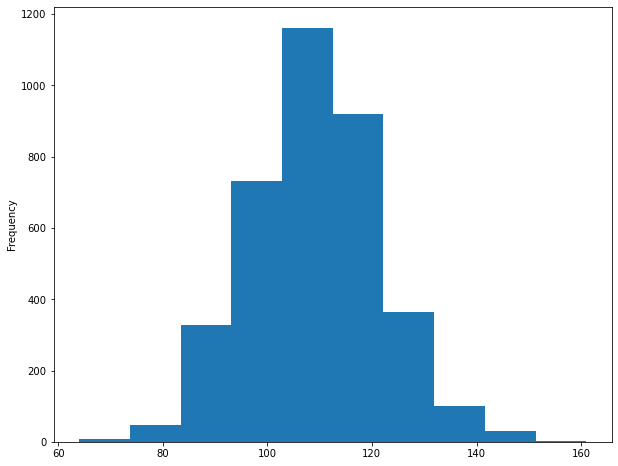

In [9]:
games_matchup["PTS_home"].plot.hist(bins=10, figsize=(10,8))

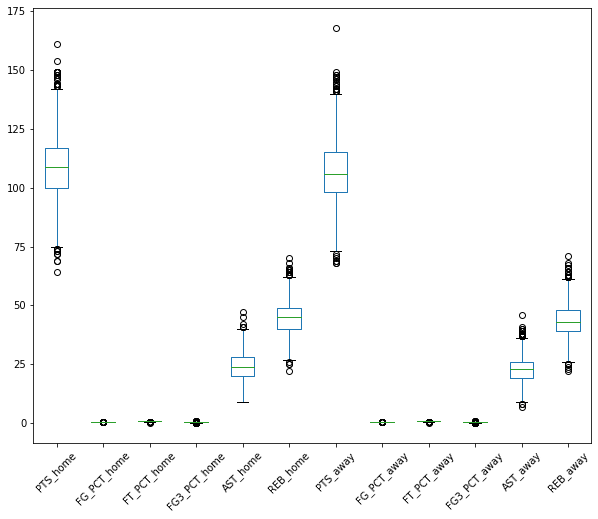

In [14]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=[    "PTS_home",
"FG_PCT_home",
"FT_PCT_home",
"FG3_PCT_home",
"AST_home",
"REB_home",
"PTS_away",
"FG_PCT_away",
"FT_PCT_away",
"FG3_PCT_away",
"AST_away",
"REB_away"])

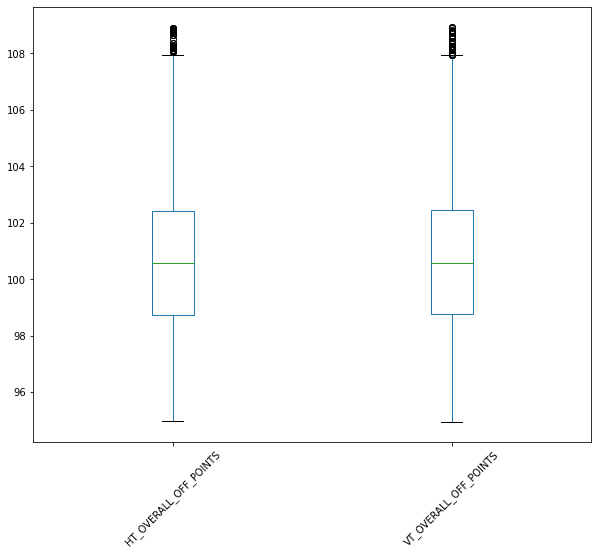

In [18]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=["HT_OVERALL_OFF_POINTS",
"VT_OVERALL_OFF_POINTS"])

In [27]:
len(games_matchup.loc[games_matchup["HT_OVERALL_OFF_POINTS"] > 108])

38